In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('..\Data\winequality-red.csv', delimiter = ';')

print(df.shape)
print(df.columns)

(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
features = df.drop(columns = ['quality'])
y = df['quality'] > 5

In [28]:
## Data transformation
standard_scaler_fit = StandardScaler().fit(features)

X = standard_scaler_fit.transform(features)

In [29]:
## Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [30]:
## Fit a logistic regression classifier without regularization
clf_no_reg = LogisticRegression(penalty = None, multi_class='ovr')

clf_no_reg.fit(X_train, y_train)

c:\Users\LENOVO\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', penalty=None)

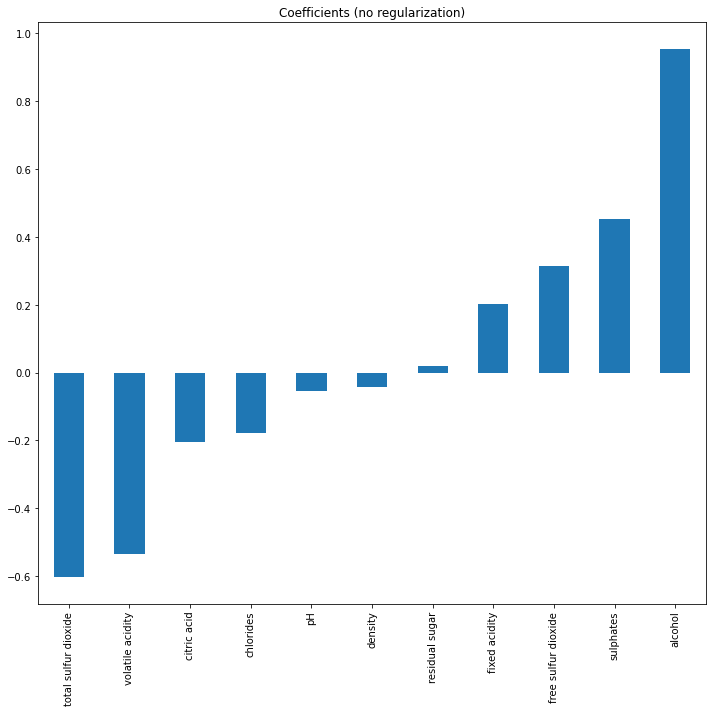

In [35]:
## Plot the coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients, predictors).sort_values()

plt.figure(figsize = (10, 10))
coef.plot(kind = 'bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()

In [36]:
## Training and test performance
from sklearn.metrics import f1_score
y_train_pred = clf_no_reg.predict(X_train)
y_test_pred = clf_no_reg.predict(X_test)

print(f"Training Score: {f1_score(y_train, y_train_pred)}")
print(f"Test Score: {f1_score(y_test, y_test_pred)}")

Training Score: 0.7632561613144138
Test Score: 0.760806916426513


In [37]:
## L2_regularization
clf_l2 = LogisticRegression()
clf_l2.fit(X_train, y_train)

LogisticRegression()

In [38]:
## Ridge Scores
y_train_pred_ridge = clf_l2.predict(X_train)
y_test_pred_ridge = clf_l2.predict(X_test)

print(f"Training Score: {f1_score(y_train, y_train_pred_ridge)}")
print(f"Test Score: {f1_score(y_test, y_test_pred_ridge)}")

Training Score: 0.7632561613144138
Test Score: 0.760806916426513


In [39]:
## Coarse-grained hyperparameter tuning
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]

for x in C_array:
    clf_l2 = LogisticRegression(C = x)
    clf_l2.fit(X_train, y_train)

    y_train_pred = clf_l2.predict(X_train)
    y_test_pred = clf_l2.predict(X_test)

    training_array.append(f1_score(y_train, y_train_pred))
    test_array.append(f1_score(y_test, y_test_pred))

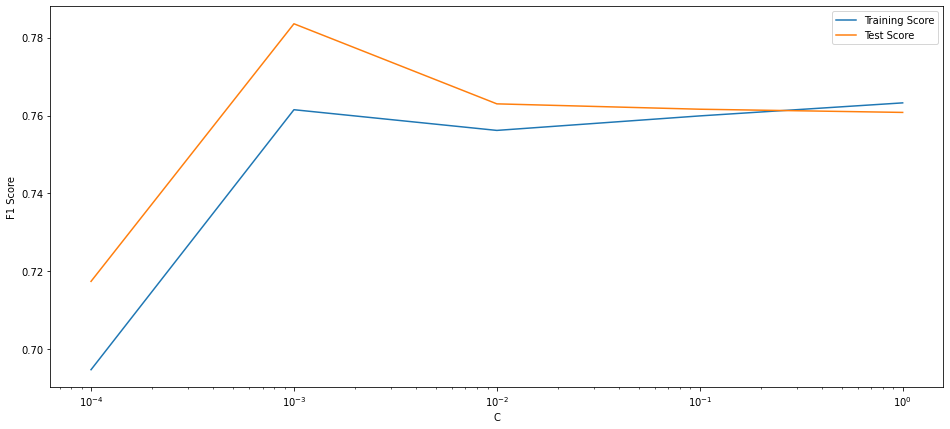

In [40]:
## Plot training and test scores as a function of C
plt.figure(figsize = (16, 7))
plt.plot(C_array, training_array, label = 'Training Score')
plt.plot(C_array, test_array, label = 'Test Score')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [42]:
## Hyperparameter Tuning for L2 Regularization
C_array = np.logspace(-4, -2, 100)
tuning_C = {'C': C_array}

gs = GridSearchCV(LogisticRegression(), tuning_C, cv = 5, scoring = 'f1')
gs.fit(X_train, y_train)

print(gs.best_params_, gs.best_score_)

{'C': 0.0011233240329780276} 0.7620533466713958


In [43]:
clf_best = LogisticRegression(C = gs.best_params_['C'])
clf_best.fit(X_train, y_train)

y_test_best = clf_best.predict(X_test)

print(f"Test Score: {f1_score(y_test, y_test_best)}")

Test Score: 0.7833333333333333


In [51]:
# Feature Selection using L1 Regularization
C_array = np.logspace(-2, 2, 100)

clf_l1 = LogisticRegressionCV(penalty = 'l1', Cs = C_array, cv = 5, solver = 'liblinear', scoring = 'f1')
clf_l1.fit(X, y)

print('Best C value', clf_l1.C_)
print('Best fit coefficients', clf_l1.coef_)

Best C value [0.25950242]
Best fit coefficients [[ 0.11601631 -0.55615292 -0.17231563  0.03124002 -0.173418    0.20070854
  -0.50607224  0.         -0.07066759  0.43228189  0.94097023]]


In [52]:
coefficients

array([ 1.51585978e-01, -5.20666873e-01, -1.74780333e-01,  8.85135565e-05,
       -1.73349701e-01,  3.01180601e-01, -5.90542006e-01, -3.18684366e-03,
       -6.01623167e-02,  4.34722310e-01,  9.60737814e-01])

In [53]:
clf_l1.coef_

array([[ 0.11601631, -0.55615292, -0.17231563,  0.03124002, -0.173418  ,
         0.20070854, -0.50607224,  0.        , -0.07066759,  0.43228189,
         0.94097023]])

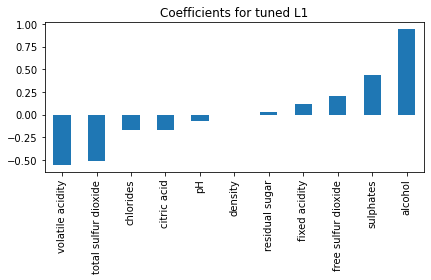

In [54]:
## Plotting the tuned L1 coefficients
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
